# <p style='text-align: center;'>ĐỒ ÁN CUỐI KÌ: KHOA HỌC DỮ LIỆU VÀ ỨNG DỤNG</p>

<p style='text-align: right;'> <em>Họ tên: Nguyễn Huỳnh Xuân Mai - Lê Công Tuyền </p>

<p style='text-align: right;'> MSSV: 1712091 - 1612793</em></p>

# 1. GIỚI THIỆU VỀ TRANG WEB CHỢ TỐT
<img src="https://i0.wp.com/s1.uphinh.org/2020/12/22/logo-cho-tot.jpg" alt="Parrondo" border="0" width="300"/> 
- Mục tiêu của Chợ Tốt là sẽ trở thành thị trường mua bán trực tuyến hàng đầu Việt Nam. Mục đích của Chợ Tốt là cho phép người mua và người bán kết nối và giao dịch an toàn, dễ dàng trong một môi trường tiện lợi và rõ ràng.
- Tất cả các hạng mục đều có trên trang web, cho dù nó là dành cho mua, bán, tìm kiếm nhà cửa, xe ô tô, tuyển dụng, đồ điện tử đã qua sử dụng, vật nuôi, và cả dịch vụ gia đình. Mục đích của trang web là cung cấp cho người Việt Nam một nền tảng trực tuyến để sử dụng một cách đơn giản, tiện lợi, không rắc rối phức tạp. Không cần phải đăng ký và ai cũng có thể tìm kiếm và đăng các thông tin liên quan về các danh mục sản phẩm cần bán khác nhau, từ bất động sản, đồ điện tử đến xe ô tô và còn nhiều hơn nữa.
<img src="https://i0.wp.com/s1.uphinh.org/2020/12/22/trang-chu-cho-tot.png" alt="Parrondo" border="0"> 
- Mỗi người trong số chúng ta đều có những sản phẩm có thể bán được. Bên cạnh việc giữ sản phẩm không cần đến ở nhà, bất kỳ ai cũng có thể kiếm thêm tiền bằng cách bán nó cho người khác thông qua thị trường mua bán trực tuyến này.
- Sản phẩm mà bạn không cần đến vẫn có thể trở thành vật quý giá với người khác. Cho nên nếu có những món hàng cần bán lại thì hãy đăng thông tin và tình trạng lên Chợ Tốt.
- [Source](https://trogiup.chotot.com/nguoi-ban/gioi-thieu-chotot-com/)

# 2. LẤY DỮ LIỆU
<img src="https://i0.wp.com/s1.uphinh.org/2020/12/23/laptop.jpg" alt="Parrondo" border="0"> 
- Dữ liệu được lấy trong bài tập này là thông tin về các laptop được đăng bán; và trang web gốc của dữ liệu được lấy là [Chợ tốt](https://www.chotot.com/toan-quoc/mua-ban-laptop).
- Về việc trang web có cho phép lấy dữ liệu về để phục vụ mục đích nghiên cứu, trong [Quy chế hoạt động sàn giao dịch thương mại điện tử trên website Chợ Tốt](https://trogiup.chotot.com/nguoi-ban/hoat-dong/) chỉ không cho phép lấy thông tin cá nhân của người đăng (tên, SĐT, email). Còn những thông tin về sản phẩm thì Quy chế không nhắc đến nhưng việc lấy dữ liệu sản phẩm phục vụ cho mục đích môn học và không có bất kì hành động trái phép nào nên nhóm em nghĩ sẽ không có vấn đề gì.
- Cách lấy dữ liệu:
    - *Bước 1*: Trước hết, cần phải Import tất cả những thư viện phục vụ cho bài làm. Để thuận tiện trong việc parse data, nhóm em sử dụng thư viện `BeautifulSoup` và `request HTMLSession`.
    - *Bước 2*: Crawl link data
    - *Bước 3*: Get data của từng trường dữ liệu

## 2.1. *BƯỚC 1:* IMPORT THƯ VIỆN

In [ ]:
# Importing libraries
!pip install requests_html
!pip install selenium
from requests_html import HTMLSession
import requests
from requests_html import HTML
import time # Dùng để sleep chương trình
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
import bs4
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Dùng để đọc và hiển thị file csv 
import datetime as dt # Dùng để xử lý dữ liệu thời gian
import re
import numpy as np
import seaborn as sns

## 2.2. *BƯỚC 2:* CRAWL LINK DATA
- Khởi tạo `baseURL` để lấy đầu nguồn URL gán vào những page link khi parse được.
- Ở đây, nhóm em quét qua 500 trang đầu được trang web đánh số từ [1-500] và mục đích là để lấy tất cả những đường link các laptop có trong mỗi trang quét qua.
<img src="https://i0.wp.com/s1.uphinh.org/2020/12/22/b2.png" alt="Parrondo" border="0"> 
- Sau đó, link các laptop được lấy bằng cách `baseURL` + `[href]` của mỗi link.

In [ ]:
#Base URL
baseURL = 'https://www.chotot.com'
links=[]
session = HTMLSession()

for i in range(1,501):
    url=f'https://www.chotot.com/toan-quoc/mua-ban-laptop?page={i}'
    r = session.get(url)
    soup=BeautifulSoup(r.text,'html.parser')
    link_element=soup.find_all("a",class_="adItem___2GCVQ")
    for a in link_element:
        links.append(baseURL + a["href"])

- Lưu tất cả những links sản phẩm vào `list`, trong đó `set` dùng để tránh lặp những link trùng nhau

In [63]:
list_link = list(set(links))
#list_link.remove('')
list_link

['https://www.chotot.com/thua-thien-hue/thanh-pho-hue/mua-ban/81267002.htm',
 'https://www.chotot.com/ha-noi/quan-dong-da/mua-ban/81266886.htm',
 'https://www.chotot.com/ha-noi/quan-cau-giay/mua-ban/46507471.htm',
 'https://www.chotot.com/tp-ho-chi-minh/quan-phu-nhuan/mua-ban/81267112.htm',
 'https://www.chotot.com/tp-ho-chi-minh/quan-phu-nhuan/mua-ban/81267258.htm',
 'https://www.chotot.com/tp-ho-chi-minh/quan-binh-thanh/mua-ban/81016945.htm',
 'https://www.chotot.com/thua-thien-hue/thanh-pho-hue/mua-ban/81267001.htm',
 'https://www.chotot.com/tp-ho-chi-minh/quan-1/mua-ban/73527594.htm',
 'https://www.chotot.com/tp-ho-chi-minh/quan-go-vap/mua-ban/80849169.htm',
 'https://www.chotot.com/tp-ho-chi-minh/quan-go-vap/mua-ban/81266774.htm',
 'https://www.chotot.com/thua-thien-hue/thanh-pho-hue/mua-ban/81267000.htm',
 'https://www.chotot.com/tp-ho-chi-minh/quan-tan-phu/mua-ban/79701900.htm#px=SR-stickyad-[PO-2][PL-top]',
 'https://www.chotot.com/tp-ho-chi-minh/quan-binh-tan/mua-ban/81266773.

- Ngoài ra, nên lưu danh sách links đã lấy được vào file .csv

In [64]:
links_dict = {"List Links":links}
link_frame = pd.DataFrame(links_dict)
link_frame.to_csv("ListLinks.csv", index=False, header = False)

In [65]:
link_frame

,List Links
0,https://www.chotot.com/tp-ho-chi-minh/quan-tan...
1,https://www.chotot.com/tp-ho-chi-minh/quan-tan...
2,https://www.chotot.com/tp-ho-chi-minh/quan-tan...
3,https://www.chotot.com/tp-ho-chi-minh/quan-tan...
4,https://www.chotot.com/tp-ho-chi-minh/quan-tan...
...,...
85,https://www.chotot.com/tp-ho-chi-minh/quan-go-...
86,https://www.chotot.com/tp-ho-chi-minh/quan-phu...
87,https://www.chotot.com/ha-noi/huyen-me-linh/mu...
88,https://www.chotot.com/tp-ho-chi-minh/quan-tan...


In [ ]:
# List Link laptop
list_link

- Tạo Dataframe `raw_data_with_no_price` bao gồm các trường dữ liệu sau:

| Brand | Model | Status | Screen Size | Processor Type | RAM Size | Graphic Card | Hard Drive | Warranty Status | Delivery |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|  |  |  |  |  |  |  |  |  |  |

- Trong đó: 
    - `Brand`: Hãng laptop
    - `Model`: Dòng laptop
    - `Status`: Tình trạng laptop (mới/đã sử dụng rồi/không có nêu trong link)
    - `Screen size`: Kích thước màn hình
    - `Processor Type`: Hãng chip
    - `RAM Size`: Dung lượng RAM
    - `Graphic Card`: Card màn hình
    - `Hard Drive`: Ổ cứng
    - `Warranty Status`: Tình trạng bảo hành (còn bảo hành/không còn bảo hành/không có nêu trong link)
    - `Delivery`: Tình trạng giao hàng (có giao hàng/không giao hàng/không có nêu trong link)

In [67]:
brand = []
model = []
status = []
screen_size = []
processor_type = []
ram = []
graphic_card = []
hard_drive = []
warranty_status = []
price = []
delivery = []
props = {}

raw_data_with_no_price = pd.DataFrame(columns = ["Brand",
                                   "Model",
                                   "Status",
                                   "Screen Size",
                                   "Processor Type",
                                   "RAM Size",
                                   "Graphic Card",
                                   "Hard Drive",
                                   "Warranty Status",
                                   "Delivery"
                                   ])

- Cho vòng lặp đi qua mỗi link có trong `list_link`:
    - `get` từng link một.
    - Định nghĩa `soup` chính là parse html.
    - Vì do tất cả các trường dữ liệu (trừ `price`) đều nằm trong thẻ `div` có `class` là <font color=red>col-md-6 no-padding adParamItem___MUGYh</font> nên ý tưởng ở đây là cho `soup` tìm tất cả các `class` có tên là 'col-md-6 no-padding adParamItem___MUGYh' và lưu vào biến `mydivs`
<img src="https://i0.wp.com/s1.uphinh.org/2020/12/23/get-data-1.png" alt="Parrondo" border="0"> 
        - Trong mỗi `div` `class` đó, tìm giá trị và text của trường dữ liệu nằm trong `span` có `class` là <font color=red>media-body media-middle</font>.
<img src="https://i0.wp.com/s1.uphinh.org/2020/12/22/get-data-2.png" alt="Parrondo" border="0"> 
        - Trở ngại duy nhất là kết quả việc tìm trên sẽ trả về cả chuỗi (vd: "Hãng: Dell") nên ý tưởng là sẽ `split` text đó ra bằng ": ". Sau khi split, (vd: "Hãng", "Dell") nhóm em lưu `title = text[0]` và `value = text[1]`, 
        - Ngoài ra, định nghĩa phương thức `props[title] = value` để từ đó thuận tiện cho việc tra cứu cũng như trích xuất dữ liệu rằng liệu value đó có nằm trong title đang kiếm hay không.
    - Sử dụng phương thức `props[title] = value` để lấy các trường dữ liệu, trong đó `title` nhóm em sẽ truy xuất dạng string.
        - Nếu chuỗi tìm kiếm có dữ liệu khi lấy về, `append` vào mảng.
        - Nếu không, `append` NaN.
- Sau khi lấy được giá trị tất cả các trường trong mỗi link, lưu tất cả các giá trị lấy được vào DataFrame `raw_data_with_no_price` đã tạo ở trên.

## 2.3. *THU THẬP TỪNG TRƯỜNG DỮ LIỆU* 

Ở đây, em thu thập dữ liệu `Price` riêng, sau đó, concat 2 Dataframe lại với nhau thành dữ liệu tổng.

In [68]:
for per_link in list_link:
    try:
        req=requests.get(per_link)
        soup=BeautifulSoup(req.text,'html.parser')
        mydivs = soup.findAll("div", {"class": "col-md-6 no-padding adParamItem___MUGYh"})
        for i in mydivs:
            i.find('span', {'class': 'media-body media-middle'})
            #print(type(a))
            a = i.text.split(': ')
            title = a[0]
            value = a[1]
            props[title] = value
            #print(title)
            #print(value)

        # Brand    
        if('Hãng' in props):
            brand.append(props['Hãng'])
        else:
            brand.append(np.nan)
    
        # Model
        if('Dòng máy' in props):
            model.append(props['Dòng máy'])
        else:
            model.append(np.nan)   
            
        if('Tình trạng' in props):
            status.append(props['Tình trạng'])
        else:
            status.append(np.nan)
            
        if('Kích cỡ màn hình' in props):
            screen_size.append(props['Kích cỡ màn hình'])
        else:
            screen_size.append(np.nan)
            
        if('Bộ vi xử lý' in props):
            processor_type.append(props['Bộ vi xử lý'])
        else:
            processor_type.append(np.nan)
            
        if('RAM' in props):
            ram.append(props['RAM'])
        else:
            ram.append(np.nan)
            
        if('Card màn hình' in props):
            graphic_card.append(props['Card màn hình'])
        else:
            graphic_card.append(np.nan)
            
        if('Ổ cứng' in props):
            hard_drive.append(props['Ổ cứng'])
        else:
            hard_drive.append(np.nan)
            
        if('Tình trạng bảo hành' in props):
            warranty_status.append(props['Tình trạng bảo hành'])
        else:
            warranty_status.append(np.nan)
        
        if('Giao hàng tận nơi' in props):
            delivery.append(props['Giao hàng tận nơi'])
        else:
            delivery.append(np.nan)
    except Exception as e: # Có thể là do hết lượng request được phép, hoặc hết page, ...
        print(f'Error: {e}')
        
temp_df = pd.DataFrame({"Brand": brand,
                        "Model": model,
                        "Status": status,
                        "Screen Size": screen_size,
                        "Processor Type": processor_type,
                        "RAM Size": ram,
                        "Graphic Card": graphic_card,
                        "Hard Drive": hard_drive,
                        "Warranty Status": warranty_status,
                        "Delivery": delivery}) 

raw_data_with_no_price = raw_data_with_no_price.append(temp_df, ignore_index=True)
raw_data_with_no_price.to_csv("Data1.csv", index=False)
raw_data_with_no_price

,Brand,Model,Status,Screen Size,Processor Type,RAM Size,Graphic Card,Hard Drive,Warranty Status,Delivery
0,Dell,Latitude,Đã sử dụng (chưa sửa chữa),15 - 16.9 inch,Intel Core i5,8 GB,NVIDIA,256 GB,NaN,NaN
1,Hãng Khác,Dòng Khác,Đã sử dụng (chưa sửa chữa),13 - 14.9 inch,Intel Core i7,8 GB,Onboard,128 GB,NaN,NaN
2,Dell,Latitude,Đã sử dụng (chưa sửa chữa),13 - 14.9 inch,Intel Core i5,4 GB,Onboard,128 GB,NaN,NaN
3,Lenovo,ThinkPad,Đã sử dụng (chưa sửa chữa),11 - 12.9 inch,Intel Core i5,4 GB,Onboard,128 GB,NaN,Tự giao hoặc đặt dịch vụ giao hàng
4,Lenovo,ThinkPad,Đã sử dụng (chưa sửa chữa),11 - 12.9 inch,Intel Core i5,4 GB,Onboard,128 GB,NaN,Tự giao hoặc đặt dịch vụ giao hàng
...,...,...,...,...,...,...,...,...,...,...
85,Apple,Macbook Pro,Đã sử dụng (chưa sửa chữa),15 - 16.9 inch,Intel Core i7,16 GB,Khác,256 GB,Còn bảo hành,Không giao hàng
86,Dell,Latitude,Đã sử dụng (chưa sửa chữa),13 - 14.9 inch,Intel Core i5,4 GB,Khác,128 GB,Còn bảo hành,Không giao hàng
87,Apple,Macbook Air,Đã sử dụng (chưa sửa chữa),13 - 14.9 inch,Intel Core i5,4 GB,Khác,128 GB,Còn bảo hành,Không giao hàng
88,Apple,Macbook Pro,Đã sử dụng (chưa sửa chữa),15 - 16.9 inch,Intel Core i7,16 GB,NVIDIA,512 GB,Còn bảo hành,Tự giao hoặc đặt dịch vụ giao hàng


In [ ]:
price = []

P = pd.DataFrame(columns = ["Price"])

for per_link in list_link:
    try:
        req=requests.get(per_link)
        soup=BeautifulSoup(req.text,'html.parser')
        p=soup.find("meta", {'itemprop':"price"})
        if p:
            price.append(p.attrs['content'])
        else:
            price.append(np.nan)
        
    except Exception as e: # Có thể là do hết lượng request được phép, hoặc hết page, ...
        print(f'Error: {e}')
        
temp_df = pd.DataFrame({"Price": price}) 

P = P.append(temp_df, ignore_index=True)
P.to_csv("PriceData.csv", index=False)
P

In [ ]:
laptop = pd.concat([raw_data_with_no_price, P], axis = 1)
laptop.to_csv('Laptop Data.csv', index = False, header = False)

In [ ]:
laptop

In [ ]:
laptop.sample(20)

# TIỀN XỬ LÝ DỮ LIỆU

In [8]:
f = open("Laptop Data.csv", 'r', encoding='utf-8')
laptops = f.readlines()
brand_s = []
model_s = []
status_s = []
screen_size_s = []
processor_s = []
ram_s = []
graphic_s = []
hard_drive_s = []
warranty_s = []
price_s = []
alpha_s = []

for lt in laptops:
  lt_specs = lt.replace('\n', '').split(',')
  
  # status
  status = lt_specs[2]
  if ('Mới' in status):
    status = 18  # mean price of new laptops
  elif ('chưa sửa chữa' in status):
    status = 11
  else:
    status = 11
  status_s.append(status)

  # screen size
  screen_size = lt_specs[3]
  # screen_size_s.append(screen_size)
  if ('12.9' in screen_size):
    screen_size_s.append(12)
  elif ('14.9' in screen_size):
    screen_size_s.append(14)
  elif ('16.9' in screen_size):
    screen_size_s.append(16)
  elif ('10.9' in screen_size):
    screen_size_s.append(10)
  elif ('18.9' in screen_size):
    screen_size_s.append(18)
  elif ('20.9' in screen_size):
    screen_size_s.append(20)
  elif ('>= 21' in screen_size):
    screen_size_s.append(22)
  elif ('< 9' in screen_size):
    screen_size_s.append(8)

  # processor type
  processor = lt_specs[4]
  processor_s.append(processor)
  
  # ram
  ram = lt_specs[5]
  if ('> 32' in ram):
      ram = '40'
  if ('< 1' in ram):
    ram = '0'
  if (ram):
    ram = int(ram.split(' ')[0])
  else:
    ram = np.nan
  ram_s.append(ram)

  # graphic card
  graphic = lt_specs[6]
  if (graphic):
    if ('Onboard' in graphic or 'Khác' in graphic):
      graphic = 2
    else:
      graphic = 5
  else:
    graphic = 1
  graphic_s.append(graphic)

  # hard drive
  hard_drive = lt_specs[7]
  if ('> 1 TB' in hard_drive):
    hard_drive = '2048'
  elif ('TB' in hard_drive):
    hard_drive = '1024'
  if ('< 128' in hard_drive):
    hard_drive = '64'
  hard_drive = int(hard_drive.split(' ')[0])
  hard_drive_s.append(hard_drive)

  # warranty
  warranty = lt_specs[8]
  if ('Còn bảo hành' in warranty):
    warranty = 5
  else:
    warranty = 1
  warranty_s.append(warranty)

  # brand
  brand = lt_specs[0]
  brand_s.append(brand)

  # Model
  model = lt_specs[1]
  model_s.append(model)

  # price
  price = lt_specs[10]
  if (price):
    price = int(price)
  else:
    price = np.nan
  price_s.append(price)

  # test alpha
  alpha_s.append(status * warranty * graphic)

## save to data frame
d = {'Brand': brand_s, 
     'Model': model_s, 
     'Price': price_s, 
     'RAM': ram_s, 
     'Memory': hard_drive_s, 
     'Screen_size': screen_size_s, 
     'Status': status_s, 
     'Warranty': warranty_s, 
     'Graphic_card': graphic_s,
     'Processor Type': processor_s,
     "Alpha": alpha_s}
    
laptop_df = pd.DataFrame(data=d)
laptop_df.dropna(inplace=True)
laptop_df = laptop_df[laptop_df['Price'] >= 5000000.0]
laptop_df.to_csv('My Laptop Data.csv', index = False, header = True)

In [10]:
laptop_df = pd.read_csv('My Laptop Data.csv')

In [ ]:
laptop_df

In [ ]:
laptop_df.info()

In [ ]:
laptop_df.describe()

In [ ]:
laptop_df.dtypes

# TRỰC QUAN HÓA DỮ LIỆU

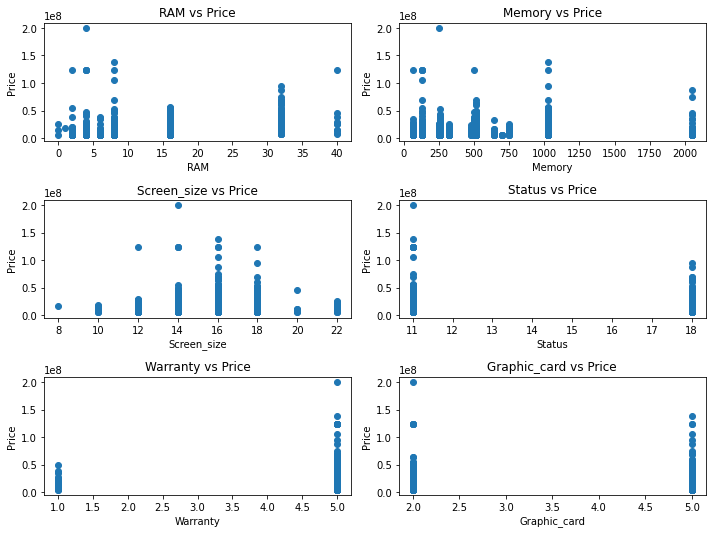

In [15]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(laptop_df[x],laptop_df['Price'])
    plt.title(x +' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)


plt.figure(figsize=(10,12))

scatter('RAM', 1)
scatter('Memory', 2)
scatter('Screen_size', 3)
scatter('Status', 4)
scatter('Warranty', 5)
scatter('Graphic_card', 6)

plt.tight_layout()

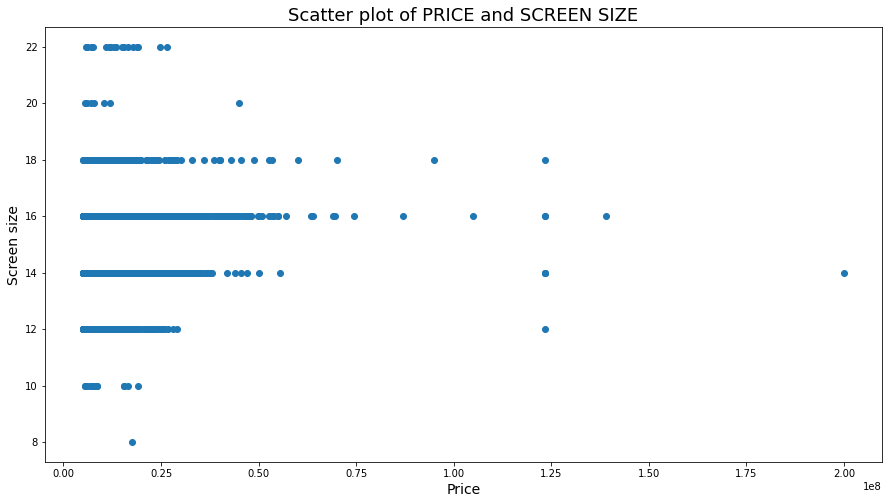

In [16]:
# here we set the figure size to 15x8
plt.figure(figsize = (15, 8))
# plot two values price per monitorSize
plt.scatter(laptop_df.Price, laptop_df.Screen_size)
plt.xlabel("Price", fontsize = 14)
plt.ylabel("Screen size", fontsize = 14)
plt.title("Scatter plot of PRICE and SCREEN SIZE", fontsize = 18)
plt.show()

- **Nhận xét**: 
    - Từ hình trên thấy là, kích thước màn hình tăng thì giá máy tính sẽ tăng. Trung bình, với máy tính có màn hình khoảng 14 -16 inch thì có giá khoảng từ 10 đến 20 triệu.
    - Tuy nhiên, giá máy tính còn phụ thuộc vào nhiều cấu hình khác nhau, ví dụ như nhãn hiệu sản phẩm.

In [ ]:
# Tách một DataFrame đối với những laptop brandnew
laptop_brand_new_df = laptop_df[laptop_df['Status'] == 10]

# Tách một DataFrame đối với những laptop second-hand
laptop_second_hand_df = laptop_df[laptop_df['Status'] == 5]

In [ ]:
f, ax = plt.subplots(figsize = (15, 12))
sns.stripplot(data = laptop_brand_new_df, x = 'Price', y = 'Brand', jitter=.25, palette=sns.husl_palette(14, l=0.5, s=.95))
plt.show();

- **Nhận xét**:
    - Các nhãn hiệu phổ biến như Dell, HP, Toshiba, Acer, Asus, Lenovo, Sony, SamSung có mức giá trung bình và phổ biến, nhiều phân khúc giá <font color=red>đối với laptop còn mới</font> cho khoảng từ 5 - 25 triệu. 
    - Ngoài ra giữa chúng có một số chênh lệch nhỏ về giá khoảng một vài triệu đồng.
        - Các nhãn hiệu Apple, MSI, Lenovo có mức giá cao, khoảng từ 20 triệu trở lên, có nhiều lựa chọn về giá cho các sản phẩm này với mức tiền từ 20-50 triệu
    - LG là nhãn hiệu không phổ biến cho dòng laptop nên có ít sự lựa chọn, nhưng LG cũng có giá khá cao, khoảng 20 triệu. 

In [ ]:
f, ax = plt.subplots(figsize = (15, 12))
sns.stripplot(data = laptop_second_hand_df, x = 'Price', y = 'Brand', jitter=.25, palette=sns.husl_palette(14, l=0.5, s=.95))
plt.show();

- **Nhận xét:**
    - Tuy là laptop đã xài rồi nhưng giá trị của hãng Apple luôn cao hơn so với những hãng khác.
    - Tiếp đến là Dell, Asus, Lenovo
    - Không có máy tính hãng MSI nào được bán lại
    - Tuy nhiên, vẫn có nhiều máy bán với giá gần với brand new, có thể là new 80% trở lên

In [ ]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per ram size
plt.scatter(laptop_brand_new_df.Price, laptop_brand_new_df.RAM, c = 'green', marker = 'x')
plt.xlabel("Price", fontsize = 14)
plt.ylabel("RAM", fontsize = 14)
plt.title("Scatter plot of PRICE and RAM on brand new laptop", fontsize = 18)
plt.show();

- **Nhận xét:**
    - Dễ nhận thấy là với kích thước RAM càng lớn thì giá máy tính càng cao. Các kích thước RAM phổ biến là 2GB, 4GB và 8GB.
    - Với máy tính có RAM 2GB thì mức giá khoảng từ 3 triệu tới gần 20 triệu.
    - Với máy tính có RAM 4GB thì có nhiều phân đoạn giá hơn, và phụ thuộc các tiêu chí phần cứng khác thì máy tính RAM 4GB có giá khoảng từ 3 triệu tới gần 50 triệu.
    - Giống như máy tính RAM 4GB, máy tính RAM 8GB có nhiều phân đoạn giá từ 5 triệu tới 50 triệu.
    - Máy tính RAM 6GB cũng khá phổ biến (tuy không bằng máy tính RAM 2GB, 4GB hay 8GB, mức giá cho máy tính như thế này khoảng từ 10 đến gần 30 triệu.
    - Máy tính RAM lớn từ 12GB đến 16 GB ít phổ biến hơn và chúng cũng có giá khá cao từ hơn 15 triệu tới gần 50 triệu.
    - Máy tính RAM lớn 32GB trải dài mức giá từ 10 triệu trở lên.
    - Tuy nhiên, RAM trên 60GB giá cao nhất của nó là 40 triệu.

In [ ]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per ram size
plt.scatter(laptop_second_hand_df.Price, laptop_second_hand_df.RAM, c = 'purple', marker = '+')
plt.xlabel("Price", fontsize = 14)
plt.ylabel("RAM", fontsize = 14)
plt.title("SCATTER PLOT OF PRICE & RAM ON SECOND HAND LAPTOP", fontsize = 18)
plt.show();

- **Nhận xét:**
    - Dễ nhận thấy là với kích thước RAM càng lớn thì giá máy tính càng cao. Các kích thước RAM phổ biến là 2GB, 4GB và 8GB.
    - Với máy tính có RAM 2GB thì mức giá khoảng từ 3 triệu tới 23 triệu.
    - Với máy tính có RAM 4GB thì có nhiều phân đoạn giá hơn, và phụ thuộc các tiêu chí phần cứng khác thì máy tính RAM 4GB có giá khoảng từ 3 triệu tới gần 25 triệu.
    - Giống như máy tính RAM 4GB, máy tính RAM 8GB có nhiều phân đoạn giá từ 3 triệu tới 30 triệu.
    - Máy tính RAM 6GB cũng khá phổ biến (tuy không bằng máy tính RAM 2GB, 4GB hay 8GB), mức giá cho máy tính như thế này khoảng từ 30 đến gần 10 triệu.
    - Máy tính RAM lớn từ 12GB đến 16 GB ít phổ biến hơn và chúng c;./ũng có giá khá cao từ hơn 15 triệu tới hơn 50 triệu.
    - Máy tính RAM lớn 32GB giá trải đều tới 75 triệu.
    - Máy tính RAM trên 60GB giá từ 5 triệu đến 50 triệu.

In [ ]:
laptop_second_hand_df

In [ ]:
print('Số lượng các dòng máy tính trong dữ liệu:', len(laptop_df.Brand.unique()))
laptop_df['Brand'].value_counts()

In [ ]:
plt.figure(figsize=(15,8))
laptop_df.Brand.value_counts().nlargest(10).plot(kind='barh', color = ['blue', 'g', 'r', 'c', 'm', 'y', 'grey', 'black', 'brown', 'pink'], alpha = 0.65)
plt.xlabel('Số lượng máy tính', fontsize = 14)
plt.ylabel('Dòng máy', fontsize = 14)
plt.title("TOP 10 MULTIPLE DISTRIBUTION LAPTOP",fontsize = 18)
plt.show();

- **Nhận xét:**
    - Nếu dựa trên Price về cấu hình máy, Dell luôn được người dùng ưa chuộng (vì đa số người đăng tin trên Chợ tốt tầm cỡ 20-40 tuổi) và số lượng người bán lại Dell gấp đôi so với những hãng khác (2.5k/6k data = 1/3 data)
    - Sẽ không bất ngờ khi người sử dụng Apple đứng thứ hai vì cấu hình máy cũng như hệ điều hành và mức độ phổ biến của nó trên toàn cầu.

In [ ]:
f, ax = plt.subplots(figsize=(17, 10))
sns.stripplot(data = laptop_df, x='Price', y='Processor Type', jitter=.5)
plt.show();

- **Nhận xét:**
    - Hình trên thể hiện phân phối dữ liệu giữa 17 hãng sản xuất chip với thị phần laptop. Chip Intel được sử dụng trên hầu hết laptop với mức giá trung bình từ 5 triệu tới 25 triệu. Chip AMD rất ít được sử dụng trên laptop.
    - Một số hãng khác cũng rất ít được sử dụng và mức độ phân phối không nhiều.

In [ ]:
f, ax = plt.subplots(figsize=(15, 40))
sns.violinplot(data = laptop_df, x='Price', y='Processor Type')
plt.show();

- **Nhận xét:**
    - Hình này ngoài việc thể hiện phân phối dữ liệu, chúng còn cho thấy mức giá tối thiểu, tối đa, hay giá trị trung bình cho từng loại chip

Em sẽ vẽ một biểu đồ heatmap để xem xét mức độ tương quan của các features với nhau. Hoặc có thể sử dụng code dưới đây để kiểm tra mức độ tương quan của các features với nhau.

In [ ]:
# Cách 1 dùng code để tìm ra mức độ tương quan các giá trị 
laptop_df_int = laptop_df.select_dtypes(include = ['int64', 'float64'])

# corr(): Được sử dụng để tìm mối tương quan theo cặp của tất cả các cột trong khung dữ liệu. 
laptop_df_int = laptop_df_int.corr()
laptop_df_int

In [ ]:
# Cách 2 dùng heatmap để tìm ra mức độ tương quan các giá trị
plt.figure(figsize=(12, 10))
sns.heatmap(laptop_df_int, annot = True, fmt = "n")

# MÔ HÌNH

### Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
# Khởi tạo mô hình
model1 = LinearRegression()
model_all = LinearRegression()  

# Chuẩn bị dữ liệu
train_Xall = laptop_df[["RAM", "Memory", "Screen_size", "Alpha", "Status"]]
train_X1 = laptop_df[["Alpha"]]
train_y = laptop_df["Price"]
# "Fit" mô hình vào dữ liệu
model1.fit(train_X1, train_y)
model_all.fit(train_Xall, train_y)
# Xem giá trị của các tham số của mô hình
print(model1.coef_) # w_1
print(model1.intercept_) # w_0

[22435.0163088]
8088083.000232522


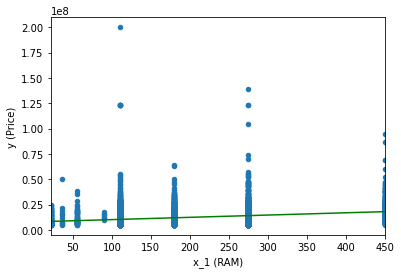

In [50]:
# Trực quan hóa mô hình tìm được
ax = laptop_df.plot.scatter(x="Alpha", y="Price")
ax.set_xlabel("x_1 (RAM)")
ax.set_ylabel("y (Price)")

min_x = train_X1.values.min() - 0.5
max_x = train_X1.values.max() + 0.5
ax.set_xlim(min_x, max_x)
ax.plot([min_x, max_x], model1.predict(np.array([[min_x], [max_x]])), color='g')

In [51]:
# Tính độ đo r^2 trên tập huấn luyện
def compute_mse(y, preds):
    return ((y - preds) ** 2).mean()
def compute_rr(y, preds, baseline_preds):
    return 1 - compute_mse(y, preds) / compute_mse(y, baseline_preds)
baseline_preds = train_y.mean()
print(compute_rr(train_y, model1.predict(train_X1), baseline_preds))
print(compute_rr(train_y, model_all.predict(train_Xall), baseline_preds))

0.05741760262977047
0.2797953028490485


### KNN Regression

In [41]:
from sklearn.model_selection import train_test_split
data = laptop_df
X = data[["RAM", "Memory", "Screen_size", "Alpha", "Status"]]
Y = data.Price
X = pd.get_dummies(data=X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


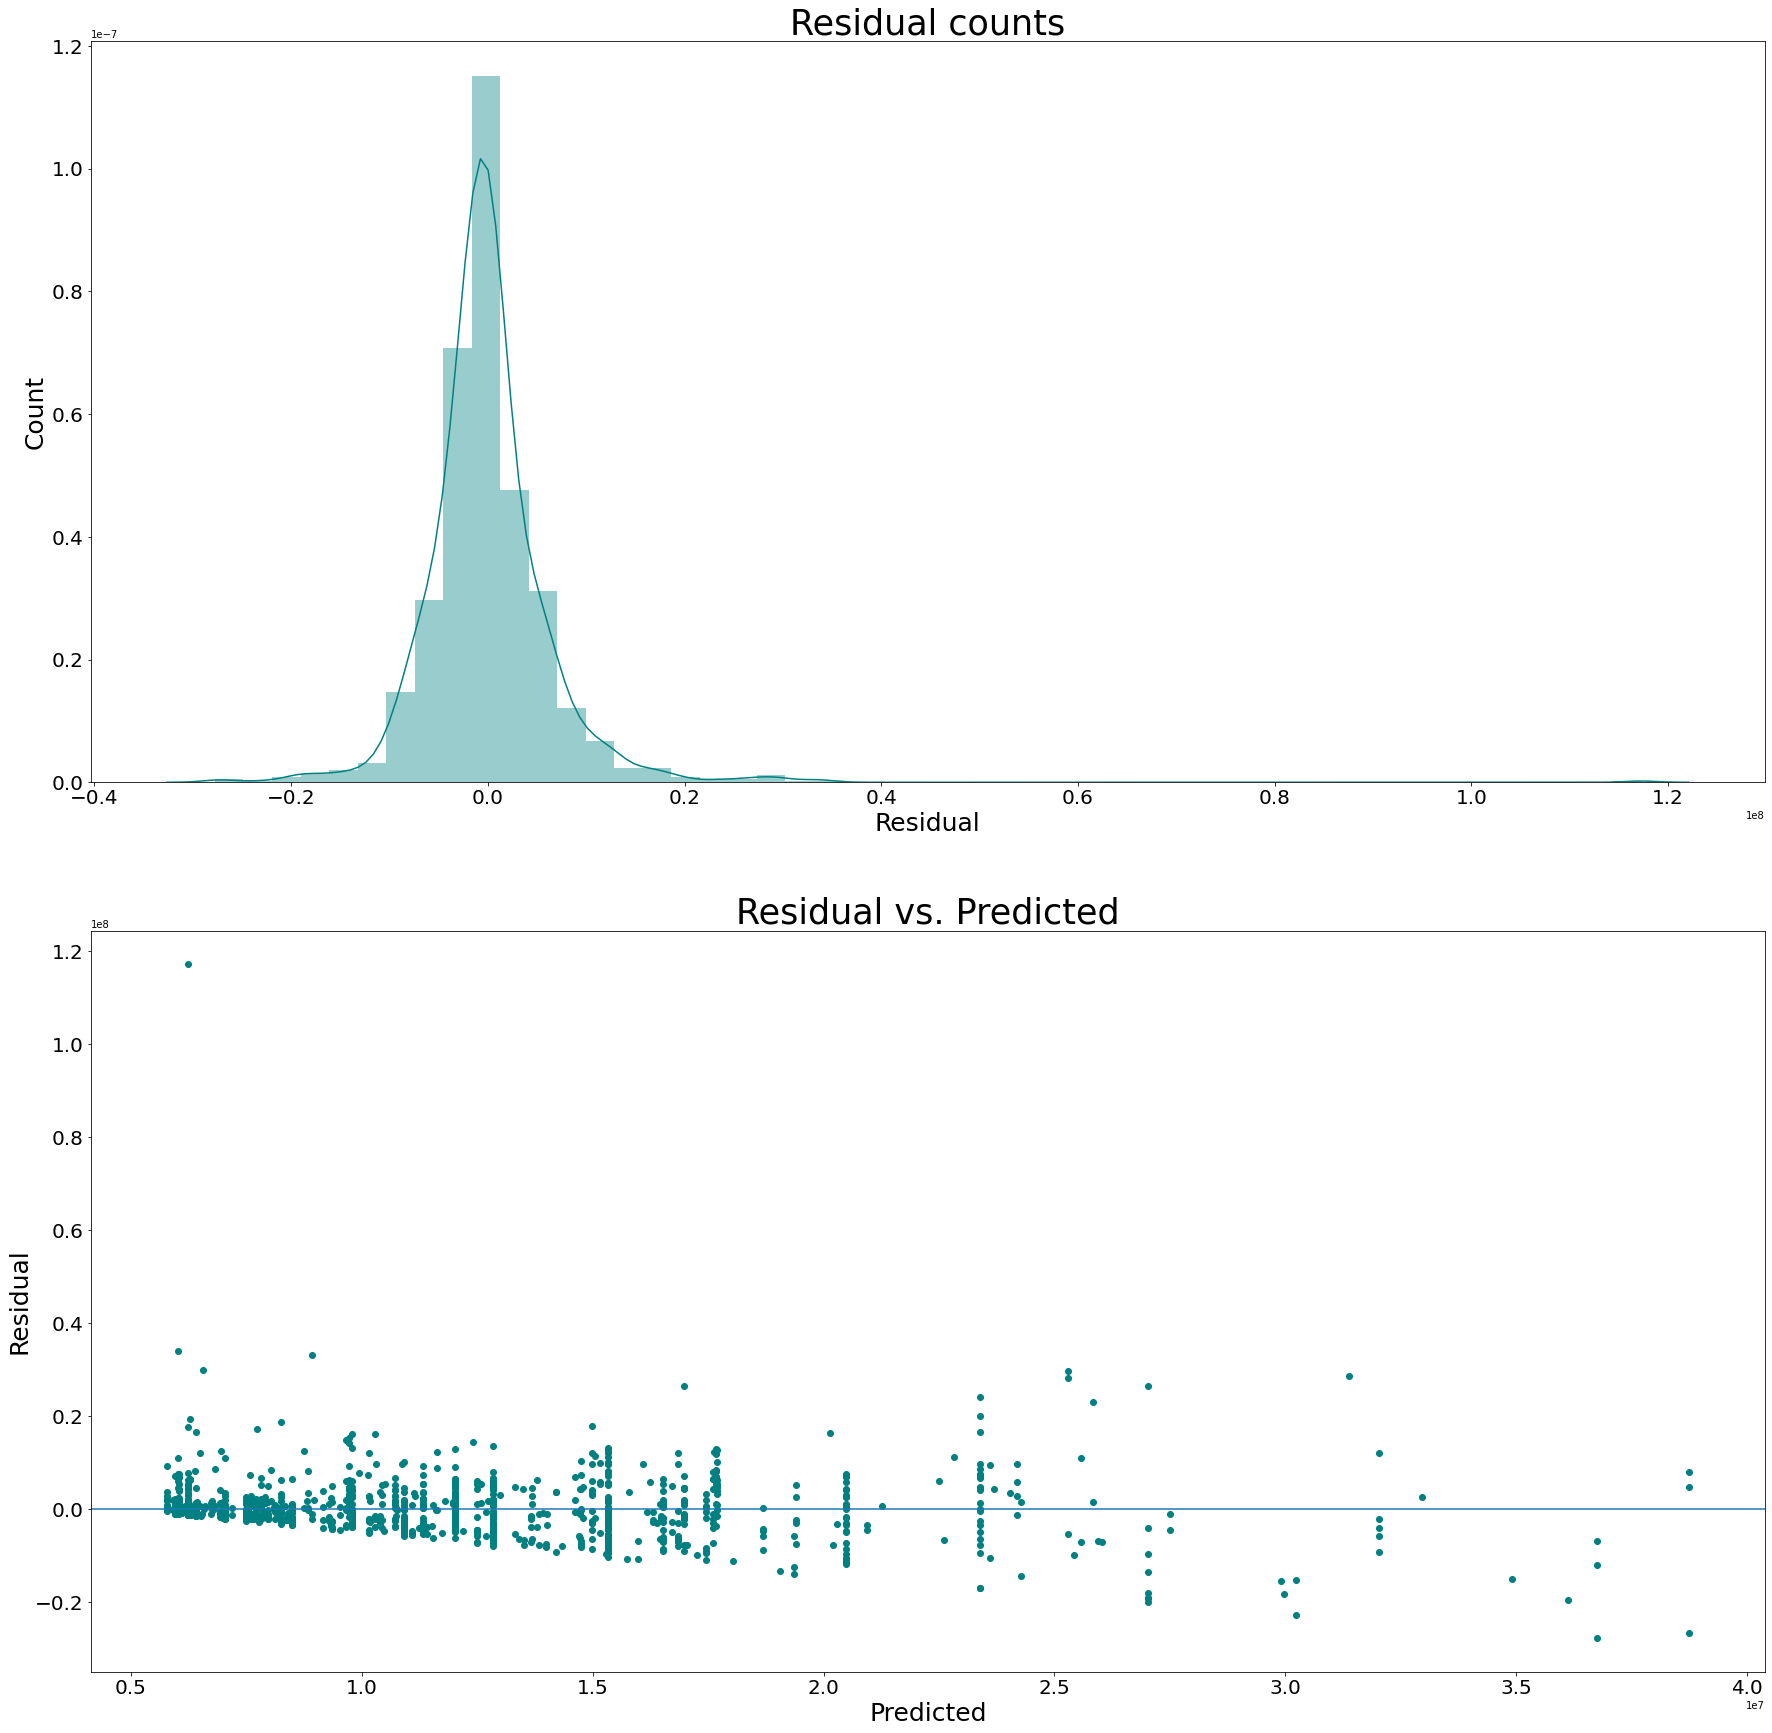

RMSE:
6739489.895538338


In [42]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [43]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.30


### Decision Tree

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


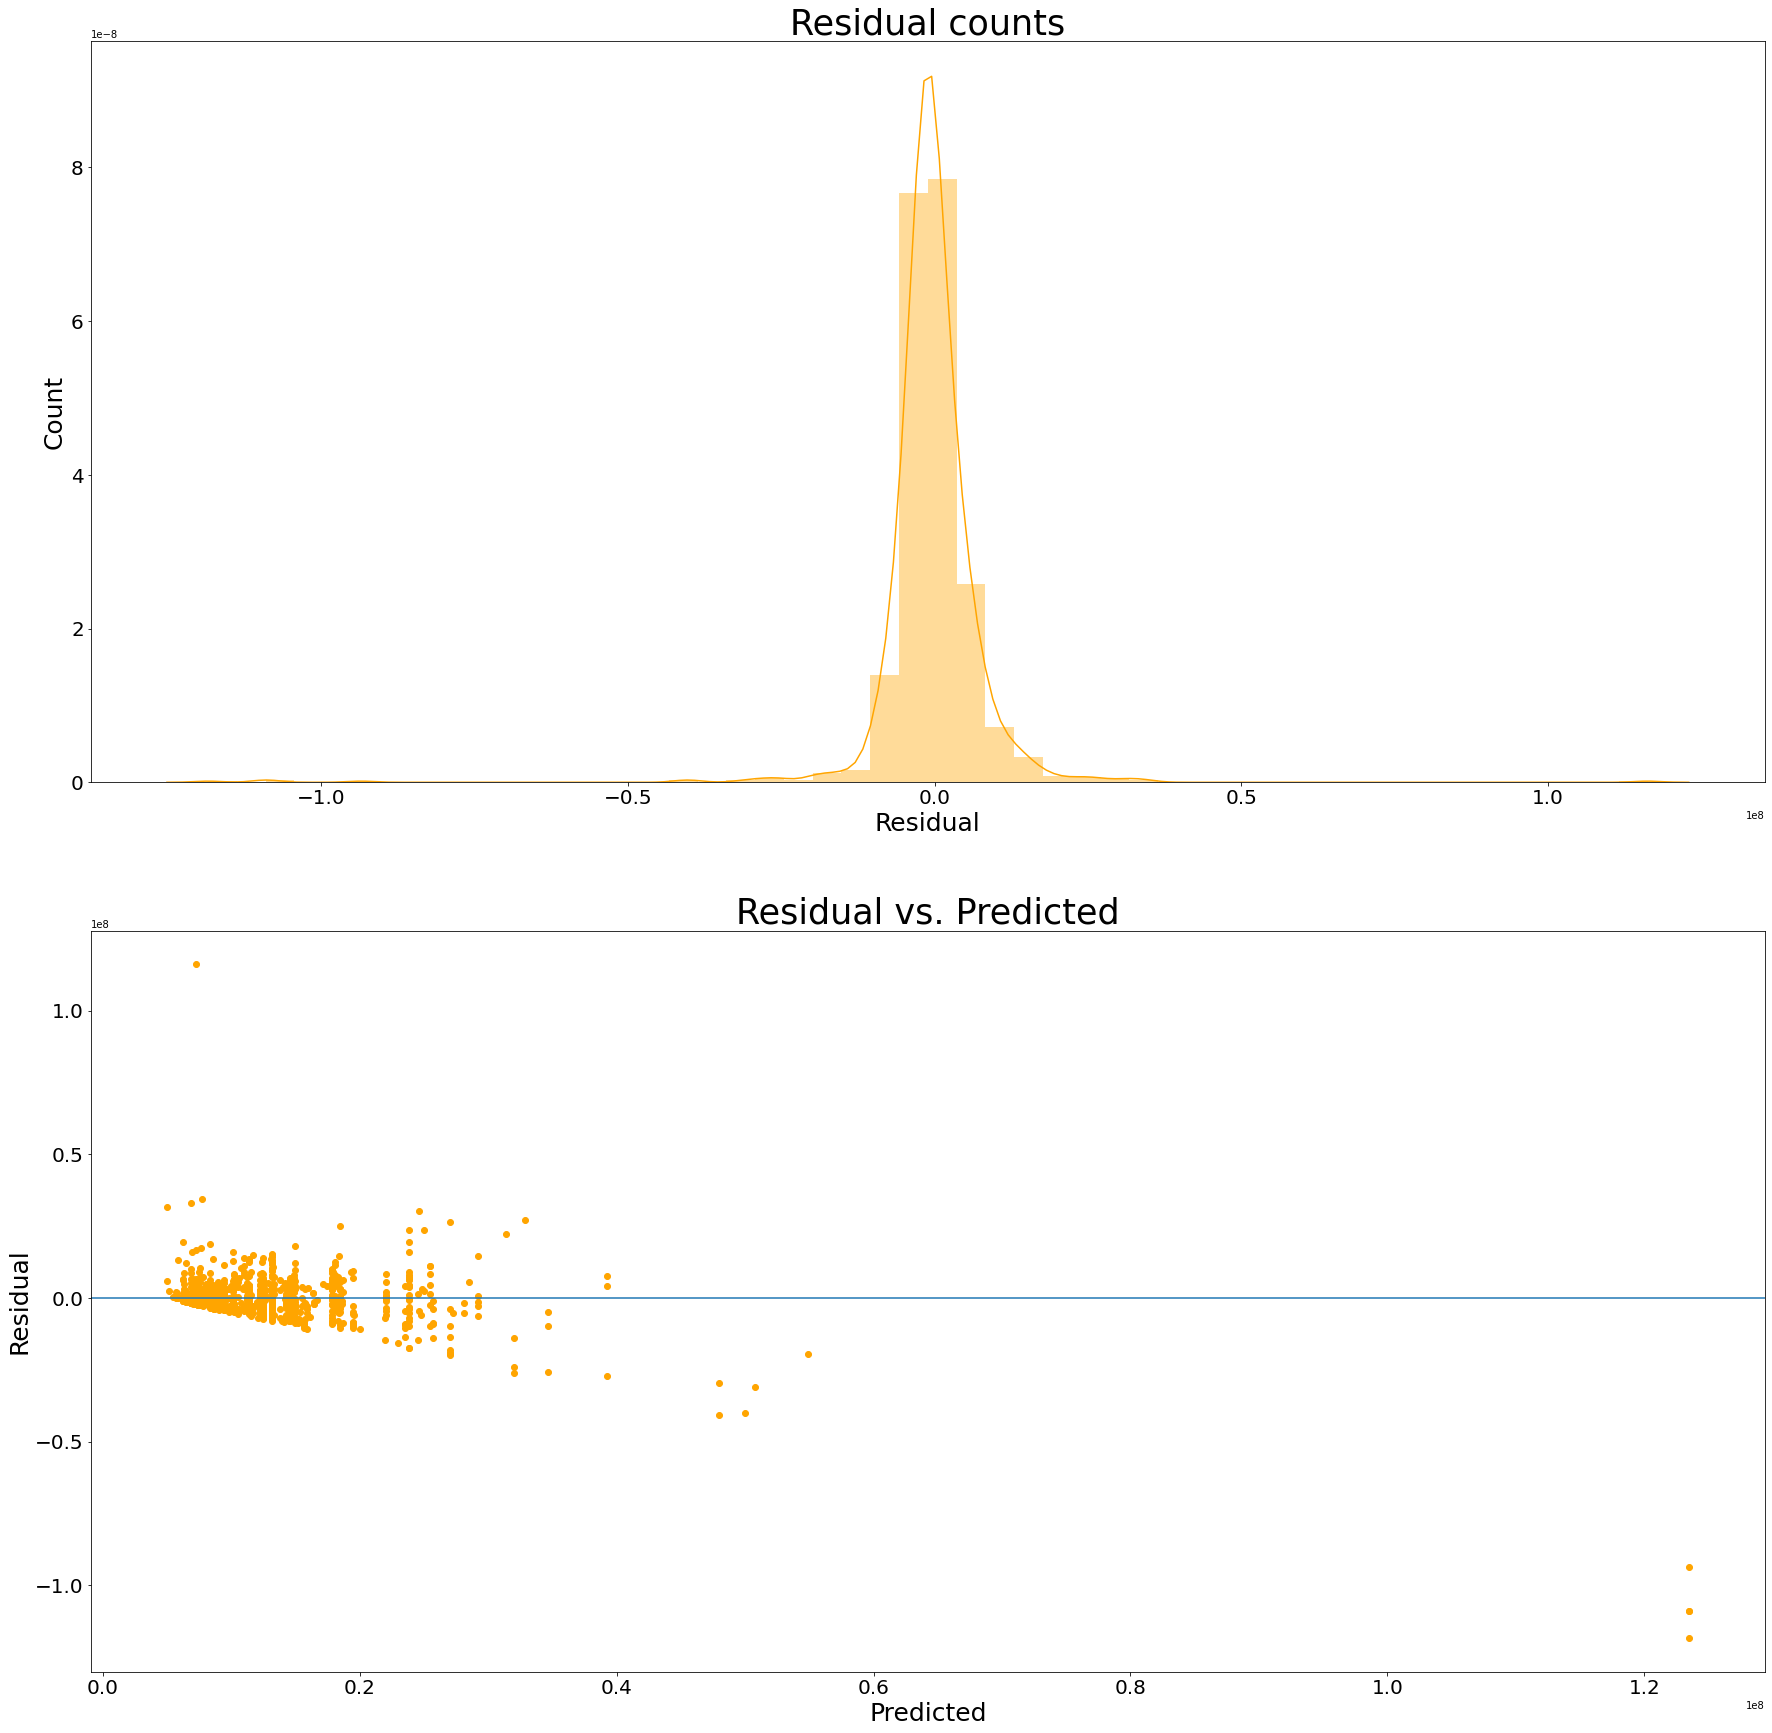

RMSE:
9267224.383369839


In [44]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [47]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.30
